In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

# Taken from this link:
# https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser?
#  lipi=urn%3Ali%3Apage%3Ad_flagship3_pulse_read%3B80EjQpzNSOSuW3Pr0Yy4ZA%3D%3D

In [2]:
from IPython.display import Latex, SVG, Image
import string as st
import random as rd
import numpy as np
import re as re
import linecache as lc

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


## 1 Ohiko Azterketa: Termodinamika eta Fisika Estatistikoa

#### 2018ko  

  **Ostirala, ekainaren 8a** 
  
----------------- 
-----------------


Azterketarako Deialdia: Termodinamika eta Fisika Estatistikoa 

EGUNA: Ekainaren 8an  
TOKIA: 2.13 eta 2.14 gelatan  
ORDUA: arratsaldeko 14:00etan  
IRAUPENA: 4 ordu, 2na ordu partzialeko  

### BALDINTZAK:

>Erabil daitezke liburuak, beti ez-digitalak eta inoiz ez ariketa-liburu
Erabiltzeko eramandako liburuak nik neuk begiratu eta aztertu ahal izango ditut, inolako oztoporik gabe
Matematikako taulak eraman eta erabil daitezke, hots, integralen taulak, garapenen taulak eta abar biltzen dituzten liburuak
Ezin dira erabili norberak egindako ariketak edo beste norbaitek egin eta/edo utzitako ariketak
Eraman eta erabil daitezke eskoletan norberak hartutako apunteak, inoiz ez beste inorenak eta beti enkuadernatuta, edo gutxienez, bilduta, lotuta

>Sakelako telefonoak, eramatekotan, utziko dira irakaslearen mahaian eta itzalita

>Mahaietan azterketa egiteko beharrezkoa den materiala baina ezin da eduki, hots, 
 - idazteko tresnak eta lotutakoak
 - ez da kalkuladorarik behar izango, beraz, ez da eraman behar

>Jasotako orri guztiak entregatu beharko dira:
 - zirriborroetarakoak
 - enuntziatuena, azterketa bera
 - azterketaren erantzunak, norberak egindakoa

>Ariketak orri-sorta banatan idatziko dira, ariketaka lotzeko eta ariketaka entregatzeko
Entregatutako orrietan norberaren identifikazioa agertuko da eta norberaren taldeko zerrendako zenbakia

>Ezin da azterketa arkatzez idatzita entregatu

>Zerbait, edozer, gauzarik txikiena ere, kopiatu dela egiaztatuz gero, azterketa partzialeko nota 0.0 izango da.
Kopiatzeak esan nahi du: norbaiti kopiatzea, nonbaitetik kopiatzea edo baldintzaren bat hautsiz kopiatzea (ariketa-linbururen batetik, esaterako; edo besteren batek egindako apunteak edo ariketak)

>Azterketan badago galtzea, nik erabakiko dut galdera denontzakoa denentz

>Azterketa-egunaren bezperara arte, baldintzen zerrenda aldatu/moldatu daiteke.
Iradokizunak onartzen dira, jakina

    
    
    
### Etorritako ikasleaki:
- 44 Monge, Nahi: 1. partziala baino ez egitera
- 49 Otamendi, Unai: osoa
- 58 Soto Asier, Mikel: osoa


In [3]:
#                        0       1       2       3       4     5      6       7       8       9       10   11   12   13  
labels_azterketak = ['P1_A1','P1_A2','P1_A3','P1_A4','P1_A5','P1','P2_A1','P2_A2','P2_A3','P2_A4','P2_A5','P2','F1','F2']

label = labels_azterketak[11]

exam is the word to change to P&_A& depending on the P2_A4

In [4]:
# Obtain the couplings for correcting the first exercise in each quiz
# read the list of participants

file_handler_read = open('../Ikasleak_2017_2018.csv', 'r')

ikasleak_dict = 'ikasleak_' + label

ikasleak_dict        = dict()
ikasleak_labels_full = []
ikasleak_labels_dni  = []
ikasleak_labels_az      = ['', '']
ikasleak_data        = []
total_lab            = ''

num = 0 # for printing reasons...see below
        # counter for generating a list of participants, to store the grades, for plotting reasons

# Structure of the file with the students list
# #          #  G NAN A1 A2 Nom conV P1_A1 P1_A2 P1_A3 P1_A4 P1_A5 P1 P2_A1 P2_A2 P2_A3 P2_A4 P2_A5 P2 F1 F2 email N_M
# words[]    0  1  2  3  4    5    6   7     8     9    10    11   12  13    14    15    16    17   18 19  20  21  22

labels_azterketak = ['P1_A1','P1_A2','P1_A3','P1_A4','P1_A5','P1','P2_A1','P2_A2','P2_A3','P2_A4','P2_A5','P2','F1','F2']

for i in range(7):
    next(file_handler_read) # skips the header line of the file

for line in file_handler_read:
    words = line.strip().split(';')
    
    # Generate a data file to store information on the student
    #                     order          F, FI, I      NAN       A1        A2        Nom       conV      e-mail
    #  words[]            0-2char        0-2char       2         3         4         5         6         21
    ikasleak_data.append([words[0], words[1], words[2], words[3], words[4], words[5], words[6], words[-2]])
    
    i = 2
    #for word in words[3:6]:
    #    words[i] = word.lower()
    #    i += 1
    key_label = '%s_%s_%s' % (words[3].lower(), words[4].lower(), words[5].lower())
    
    ikasleak_dict[str(key_label)] = words[2]
    # printing for editing reasons...
    #  generates a list, each element containing a student
    #  it is the "same" as participants_quiz_# except that it contains the complete lables for each student
    ikasleak_labels_full.append('_' + words[0] + \
                                      '_' + ikasleak_dict[str(key_label)] + \
                                      '_' + words[3].lower() + '_' + words[4].lower() + '_' + words[5].lower())
    
    # for the same token
    #  generate the labels for the plotting, extracting the NAN numbers an storing in the 
    ikasleak_labels_dni.append(words[2])
    
    ikasleak_labels_az[num] = ' = np.array([ \n\n'  + \
        '            #[P1_A1 P1_A2 P1_A3 P1_A4 P1_A5 P1   P2_A1 P2_A2 P2_A3 P2_A4 P2_A5 P2   F1  F2]\n'      + \
        '             [%s,   %s,   %s,   %s,   %s,   %s,   %s,   %s,   %s,   %s,   %s,   %s,   %s,  %s ], \
    # 0, 1 \n' % (words[7],words[8],words[9],words[10],words[11],words[12],
                   words[13],words[14],words[15],words[16],words[17],words[18],words[19],words[20])
    
    for labels_az in labels_azterketak:
        ikasleak_labels_az[num] += '#%s   ****** \n' % labels_az + \
        '            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa \n'  + \
        '            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa \n'  + \
        '            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa \n'  + \
        '            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa \n'  
    ikasleak_labels_az[num] += '            ])\n\n'
    num += 1
    ikasleak_labels_az.append('')

ikasleak_zerrenda = ''
index = 0
for i in ikasleak_labels_full:
    ikasleak_zerrenda +=  i + ikasleak_labels_az[index] + '\n\n'
    index += 1

#print ikasleak_zerrenda

    # for generating the arrays of grades for the exercises of each student
ikasleak_notak = ' ikasleak_notak = np.array([\n\n'
for i in ikasleak_labels_full:
    ikasleak_notak += '          ' + i + ',\n'
ikasleak_notak += '\n])'

#print ikasleak_notak

for i in ikasleak_data:
    print (i)

['01', 'FI', '45824495P', 'ALONSO', 'AJURIA', 'KERMAN', '0', 'kalonso003@ikasle.ehu.eus']
['02', 'FI', '79126425P', 'ALVAREZ', 'ARGUINANO', 'IVAN', '0', 'ialvarez087@ikasle.ehu.eus']
['03', 'FI', '58010856A', 'BARRAINKUA', 'AGUIRRE', 'AINHIZE', '0', 'abarrainkua002@ikasle.ehu.eus']
['04', 'FI', '72592538F', 'ELORTEGI', 'GARCIA', 'IKER', '0', 'ielortegi002@ikasle.ehu.eus']
['05', 'FI', '72602998W', 'ETXEBERRIA', 'ETXANIZ', 'MALEN', '0', 'metxeberria032@ikasle.ehu.eus']
['06', 'FI', '44573345N', 'GABIRONDO', 'LOPEZ', 'JON', '0', 'jgabirondo001@ikasle.ehu.eus']
['07', 'FI', '43195141Z', 'GRAO', 'SUKIA', 'MARTIN', '0', 'mgrao001@ikasle.ehu.eus']
['08', 'FI', '45667451P', 'IBARRONDO', 'LOPEZ', 'RUBEN', '0', 'ribarrondo001@ikasle.ehu.eus']
['09', 'FI', '73031316Z', 'IRIZAR', 'LANDA', 'MARTIN', '0', 'mirizar007@ikasle.ehu.eus']
['10', 'FI', '72744959F', 'MARTINEZ_DE_AGUIRRE', 'JOKISCH', 'BENAT', '0', 'bmartinezdeagu001@ikasle.ehu.eus']
['11', 'FI', '45951533V', 'OGUIZA', 'MARTINEZ', 'JON', '0

In [ ]:
text_aztxo_grades = ' = np.array([ \n\n'  + \
    '            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa \n'  + \
    '            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa \n'  + \
    '            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa \n'  + \
    '            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa \n'  + \
    '            [1]                                        # 0: not present, 1: present, 2: out \n' + \
'             ])\n\n'0.
for i in ikasleak_labels_full:
    print (i + text_aztxo_grades)


In [5]:
_01_45824495P_alonso_ajuria_kerman = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_02_79126425P_alvarez_arguinano_ivan = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.50],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 3. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.25, 0.25, 0.50],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_03_58010856A_barrainkua_aguirre_ainhize = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_04_72592538F_elortegi_garcia_iker = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 000: not present, 1: present, 2: out 
             ])


_05_72602998W_etxeberria_etxaniz_malen = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_06_44573345N_gabirondo_lopez_jon = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_07_43195141Z_grao_sukia_martin = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_08_45667451P_ibarrondo_lopez_ruben = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_09_73031316Z_irizar_landa_martin = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_10_72744959F_martinez_de_aguirre_jokisch_benat = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_11_45951533V_oguiza_martinez_jon = np.array([ # ez da aurkeztu, 1.00 behar zuen, jarritako azken nota izateko

            [0.25, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_12_79009244N_ormaza_zulueta_naia = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_13_72586889Q_pedraza_aguirre_xabier = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.00, 0.00, 0.25],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.00, 0.00, 0.50],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.50],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_14_72596385J_rodriguez_escalante_asier = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.50],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_15_79127747L_agirre_olaeta_asier = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_16_58006600W_alana_alvarez_de_eulate_aitor = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.00, 0.00, 0.75],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_17_79002660Y_aldama_atxurra_unai = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_18_45947337F_aldekoa_nabaridas_eneko = np.array([ # ez da aurkeztu, 0.087 behar zuen, jarritako azken nota izateko (0.50, jarri diot) 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.50],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_19_72593011C_amezua_monasterio_oier = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_20_22759012Y_anzola_martinez_mikel = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.50],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_21_73129858R_araiz_michel_julen = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_22_16084531X_arechabaleta_gallego_kepa = np.array([ # ez da aurkeztu, 0.16 behar zuen, jarritako azken nota izateko (0.25, jarri diot) 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.25],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_23_72845075G_arrieta_umerez_benat = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.50],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_24_79117587W_bilbao_barrenechea_inigo = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.00, 0.00, 0.00, 0.25],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.00, 0.75],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_25_72823515H_cabodevilla_antonana_asier = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.00, 0.00, 0.50],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_26_16095265A_ceberio_basanez_ibai = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.00, 0.00, 0.50],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.00, 0.00, 0.25],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_27_45175718S_costa_valencia_alex = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_28_78918209B_del_rio_ruiz_aitor = np.array([  # ez da aurkeztu, 0.312 behar zuen, jarritako azken nota izateko (1.25, jarri diot)

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.25, 1.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_29_79125580Z_delgado_enales_inigo = np.array([ 

            [0.25, 0.25, 0.25, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.00, 0.00, 0.25],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.00, 0.25, 0.50],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_30_44566304D_dorronsoro_larbide_aritz = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_31_44157282L_epelde_martija_inigo = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_32_78998246P_etxebarria_erdoiza_jone = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_33_46366042C_garcia_ibarluzea_markel = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.50],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.00, 0.25, 0.50],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_34_45919985W_garcia_marcaida_beatriz = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.00, 0.00, 0.25],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.00, 0.25, 0.50],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.00, 0.50],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_35_72516345J_hayet_otero_miren = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.50],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_36_78945881Z_hernandez_bravo_joseba = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.00, 0.00, 0.25],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.00, 0.00, 0.00, 0.25],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_37_72406204L_hierro_rivero_adrian = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.50],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_38_72514570D_izagirre_madrid_irati = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_39_72556525N_lasarte_mugica_jon = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.00, 0.00, 0.75],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.00, 0.00, 0.00, 0.25],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.00, 0.00, 0.00, 0.50],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_40_79079024X_lejonagoitia_garmendia_lide = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_41_72512823X_lekuona_ugalde_eneko = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.00, 0.00, 0.00, 0.50],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_42_45993235C_llona_carbajo_unai = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [0]                                        # 0: not present, 1: present, 2: out 
             ])


_43_72317373Z_lopez_zorrilla_asier = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_44_79054297P_monge_lorenzo_nahi = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.00, 0.00, 0.50],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.00, 0.00, 0.50],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_45_45753254K_ocerin_rodriguez_ander = np.array([ # ez da aurkeztu, 0.00 behar zuen, jarritako azken nota izateko (0.0000, jarri diot) 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_46_79189202H_ondaro_mallea_lurdes = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_47_53984015W_oribe_cid_endika = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.00, 0.75],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.00, 0.00, 0.00, 0.50],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.00, 0.00, 0.50],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_48_45993909G_ortego_larrazabal_maialen = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.50],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.00, 0.00, 0.00, 0.25],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_49_72544655X_otamendi_loibide_unai = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_50_20895312L_perez_arrieta_mikel = np.array([ # ez da aurkeztu, 0.025 behar zuen, jarritako azken nota izateko (0.25, jarri diot) 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.25],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_51_45948183W_perez_delgado_inigo = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.00, 0.75],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.00, 0.00, 0.25],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_52_72754867W_plazaola_acosta_julen = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [0]                                        # 0: not present, 1: present, 2: out 
             ])


_53_79006535V_ruiz_colmenares_jon_ander = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_54_45195058N_salaverria_jimenez_inaki = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])

_55_72607828W_sancerni_benitez_imanol = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [0]                                        # 0: not present, 1: present, 2: out 
             ])


_56_49581085P_sanchez_merino_borja = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 1. ariketa 
            [0.00, 0.00, 0.25, 0.25, 0.00, 0.25, 0.75],# 2. ariketa 
            [0.25, 0.00, 0.25, 0.25, 0.25, 0.25, 0.50],# 3. ariketa 
            [0.00, 0.25, 0.25, 0.25, 0.00, 0.00, 0.50],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_57_53982183X_sasiain_casado_amaia = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [0]                                        # 0: not present, 1: present, 2: out 
             ])


_58_79130170G_soto_urruela_asier = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.00, 0.00, 0.25],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.00, 0.00, 0.25],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.00, 0.00, 0.00, 0.25],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_59_73423263H_urdangarain_legarreta_inigo = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_60_72526468Q_urio_garmendia_ander = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


## Jarraituan parte hartu dutenak ez gainditu ez dutenak

 1 42  45993235C   1.0 Carbajo Llona  
 2 44  79054297P   4.0 Monge         Termodinamika  %%%%%           
 3 52  72754867W   1.2 Plazaola   
 4 55  72607828W   0.8 Sancerni  
 5 57  53982183X   1.4 Sasiain  
 6 58  79130170G   3.0 Soto       %%%          
 
 
 

## Jarraituan parte hartu ez dutenak: den aegin behar dute


 7 15     
 8 21  
 9 27  
10 31  
11 32  
12 38    
13 49 %%%         
14 53  
15 59  

In [25]:
_15_79127747L_agirre_olaeta_asier = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_21_73129858R_araiz_michel_julen = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_27_45175718S_costa_valencia_alex = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_31_44157282L_epelde_martija_inigo = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_32_78998246P_etxebarria_erdoiza_jone = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_38_72514570D_izagirre_madrid_irati = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_42_45993235C_llona_carbajo_unai = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_44_79054297P_monge_lorenzo_nahi = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_49_72544655X_otamendi_loibide_unai = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])



_52_72754867W_plazaola_acosta_julen = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_53_79006535V_ruiz_colmenares_jon_ander = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_55_72607828W_sancerni_benitez_imanol = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_57_53982183X_sasiain_casado_amaia = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


_58_79130170G_soto_urruela_asier = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])


_59_73423263H_urdangarain_legarreta_inigo = np.array([ 

            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [2]                                        # 0: not present, 1: present, 2: out 
             ])


# 1. partziala baino ez dute egin behar

In [39]:
_44_79054297P_monge_lorenzo_nahi = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 2. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 3. ariketa 
            [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])

"""
Guztira lortu duen nota:
1F 1P azterketan: 1. ariketan: 2.25/2.5
                  2. ariketan: 0.75/2.5
                  guztira: 3.0/5.0
2P azterketan: P2A1_5: 2.75/5.0
               2P:     2.00/5.0
               guztira: 2.35/5.0
               
1P (1F) + 2P = 5.0/10.0

"""

_58_79130170G_soto_urruela_asier = np.array([ 

            [0.25, 0.25, 0.25, 0.25, 0.00, 0.00, 0.50],# 1. ariketa 
            [0.25, 0.25, 0.25, 0.00, 0.00, 0.00, 0.50],# 2. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 3. ariketa 
            [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])  #  2 ariketa baino ez du egin, 1. partziala baino ez zuelako egin behar
                 #  beraz, hemendik lortuko duen nota zuzenean da partzialeko nota
    
"""
Guztira lortu duen nota:
1F 1P azterketan: 1. ariketan: 1.5/2.5
                  2. ariketan: 1.0/2.5
                  guztira: 2.5/5.0
2P azterketan: P2A1_5: 7.95/10.0
               2P:     3.50/10.0
               guztira: 2.85/5.0
               
1P (1F) + 2P = 5.0/10.0

"""

'\nGuztira lortu duen nota:\n1F 1P azterketan: 1. ariketan: 1.5/2.5\n                  2. ariketan: 1.0/2.5\n                  guztira: 2.5/5.0\n2P azterketan: P2A1_5: 7.95/10.0\n               2P:     3.50/10.0\n               guztira: 2.85/5.0\n               \n1P (1F) + 2P = 5.0/10.0\n\n'

# 1. eta 2. partzialak egin behar ditu, irakasgai osoa

In [38]:
_49_72544655X_otamendi_loibide_unai = np.array([ 

            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 1. ariketa 
            [0.25, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],# 2. ariketa 
            [0.00, 0.00, 0.25, 0.00, 0.00, 0.00, 0.25],# 3. ariketa 
            [0.00, 0.25, 0.25, 0.25, 0.00, 0.00, 0.25],# 4. ariketa 
            [1]                                        # 0: not present, 1: present, 2: out 
             ])

In [26]:
str_ = 'ikasleak_' + label + ' = np.array([\n\n'

ikasleak_ = ['            '+str(i)+',\n' for i in ikasleak_labels_full]

for participant in ikasleak_:
    str_ += participant
str_ = str_ + '\n\n])'    
print (str_)



ikasleak_P2 = np.array([

            _01_45824495P_alonso_ajuria_kerman,
            _02_79126425P_alvarez_arguinano_ivan,
            _03_58010856A_barrainkua_aguirre_ainhize,
            _04_72592538F_elortegi_garcia_iker,
            _05_72602998W_etxeberria_etxaniz_malen,
            _06_44573345N_gabirondo_lopez_jon,
            _07_43195141Z_grao_sukia_martin,
            _08_45667451P_ibarrondo_lopez_ruben,
            _09_73031316Z_irizar_landa_martin,
            _10_72744959F_martinez_de_aguirre_jokisch_benat,
            _11_45951533V_oguiza_martinez_jon,
            _12_79009244N_ormaza_zulueta_naia,
            _13_72586889Q_pedraza_aguirre_xabier,
            _14_72596385J_rodriguez_escalante_asier,
            _15_79127747L_agirre_olaeta_asier,
            _16_58006600W_alana_alvarez_de_eulate_aitor,
            _17_79002660Y_aldama_atxurra_unai,
            _18_45947337F_aldekoa_nabaridas_eneko,
            _19_72593011C_amezua_monasterio_oier,
            _20_22759012

In [27]:
ikasleak_label = 'ikasleak_' + label

ikasleak_label = np.array([

            _01_45824495P_alonso_ajuria_kerman,
            _02_79126425P_alvarez_arguinano_ivan,
            _03_58010856A_barrainkua_aguirre_ainhize,
            _04_72592538F_elortegi_garcia_iker,
            _05_72602998W_etxeberria_etxaniz_malen,
            _06_44573345N_gabirondo_lopez_jon,
            _07_43195141Z_grao_sukia_martin,
            _08_45667451P_ibarrondo_lopez_ruben,
            _09_73031316Z_irizar_landa_martin,
            _10_72744959F_martinez_de_aguirre_jokisch_benat,
            _11_45951533V_oguiza_martinez_jon,
            _12_79009244N_ormaza_zulueta_naia,
            _13_72586889Q_pedraza_aguirre_xabier,
            _14_72596385J_rodriguez_escalante_asier,
            _15_79127747L_agirre_olaeta_asier,
            _16_58006600W_alana_alvarez_de_eulate_aitor,
            _17_79002660Y_aldama_atxurra_unai,
            _18_45947337F_aldekoa_nabaridas_eneko,
            _19_72593011C_amezua_monasterio_oier,
            _20_22759012Y_anzola_martinez_mikel,
            _21_73129858R_araiz_michel_julen,
            _22_16084531X_arechabaleta_gallego_kepa,
            _23_72845075G_arrieta_umerez_benat,
            _24_79117587W_bilbao_barrenechea_inigo,
            _25_72823515H_cabodevilla_antonana_asier,
            _26_16095265A_ceberio_basanez_ibai,
            _27_45175718S_costa_valencia_alex,
            _28_78918209B_del_rio_ruiz_aitor,
            _29_79125580Z_delgado_enales_inigo,
            _30_44566304D_dorronsoro_larbide_aritz,
            _31_44157282L_epelde_martija_inigo,
            _32_78998246P_etxebarria_erdoiza_jone,
            _33_46366042C_garcia_ibarluzea_markel,
            _34_45919985W_garcia_marcaida_beatriz,
            _35_72516345J_hayet_otero_miren,
            _36_78945881Z_hernandez_bravo_joseba,
            _37_72406204L_hierro_rivero_adrian,
            _38_72514570D_izagirre_madrid_irati,
            _39_72556525N_lasarte_mugica_jon,
            _40_79079024X_lejonagoitia_garmendia_lide,
            _41_72512823X_lekuona_ugalde_eneko,
            _42_45993235C_llona_carbajo_unai,
            _43_72317373Z_lopez_zorrilla_asier,
            _44_79054297P_monge_lorenzo_nahi,
            _45_45753254K_ocerin_rodriguez_ander,
            _46_79189202H_ondaro_mallea_lurdes,
            _47_53984015W_oribe_cid_endika,
            _48_45993909G_ortego_larrazabal_maialen,
            _49_72544655X_otamendi_loibide_unai,
            _50_20895312L_perez_arrieta_mikel,
            _51_45948183W_perez_delgado_inigo,
            _52_72754867W_plazaola_acosta_julen,
            _53_79006535V_ruiz_colmenares_jon_ander,
            _54_45195058N_salaverria_jimenez_inaki,
            _55_72607828W_sancerni_benitez_imanol,
            _56_49581085P_sanchez_merino_borja,
            _57_53982183X_sasiain_casado_amaia,
            _58_79130170G_soto_urruela_asier,
            _59_73423263H_urdangarain_legarreta_inigo,
            _60_72526468Q_urio_garmendia_ander,


])

In [28]:
ikasleak_counter = range(1, len(ikasleak_label)+1)

ikasleak_labels = [i for i in ikasleak_labels_dni]

label_ari_1 = label + '_ari_1' 
label_ari_2 = label + '_ari_2' 
label_ari_3 = label + '_ari_3' 
label_ari_4 = label + '_ari_4'
label_ari_dena      = label + '_ari_dena'
label_notak         = label + '_notak'

label_ari_1 = [sum(i[0][:]) for i in ikasleak_label]
label_ari_2 = [sum(i[1][:]) for i in ikasleak_label] 
label_ari_3 = [sum(i[2][:]) for i in ikasleak_label] 
label_ari_4 = [sum(i[3][:]) for i in ikasleak_label]

label_ari_dena      = [0 for i in ikasleak_label]
label_notak         = np.zeros((len(ikasleak_label), 3))

for i in ikasleak_counter:
    
    label_ari_dena[i-1] = label_ari_1[i-1] + label_ari_2[i-1] + label_ari_3[i-1] + label_ari_4[i-1]

    if label_ari_dena[i-1] >= 5.0:
        label_notak[i-1][0], label_notak[i-1][1], label_notak[i-1][2] = i, label_ari_dena[i-1], 1
    else:
        label_notak[i-1][0], label_notak[i-1][1], label_notak[i-1][2] = i, label_ari_dena[i-1], 0
        
        


`label_notak` aldagaiak dauka notebook honetan sartutako notak   
Era honetan sartu ditut notak:   

1. ekarri dut `P2_ebaluazioa.ipynb`  notebookeko notak, kopiatu baitunen notebooka  
2. gelaxaka berri batera atera ditut azterketa honetara etor zitezkeenak  
3. partzialez gainditutakoak mantendu ditut
4. hurrengo gelaxkara ekarri ditut argitaratu nituen notak `P2_ebaluazioa.ipynb` notebooketik  
  horiek dira `label_notak_def` array/ean daudenak
5. ordezkapena egin dut:  
  ```
  label_notak[:,1] = label_notak_def
  ```

In [29]:
label_notak_def = np.array([9.30,7.50,9.90,9.10,9.50,9.20,9.20,9.20,9.00,9.00,
                            6.00,9.00,6.50,8.80,0.00,9.00,9.00,5.00,8.50,8.00,
                            0.00,5.00,6.50,6.50,6.00,6.50,0.00,6.50,7.50,9.20,
                            0.00,0.00,5.00,8.50,9.00,6.00,6.50,0.00,5.00,8.70,
                            7.50,1.00,0.00,4.00,5.00,9.20,6.00,8.00,0.00,5.00,
                            8.00,1.25,0.00,9.30,0.75,8.00,1.37,3.00,0.00,9.00])

In [30]:
label_notak[:,1] = label_notak_def

In [31]:
params1 = {
          'lw' : 3,
          'ms' : 10,
          'color' : 'b',
          'alpha' : 0.2
            }
params2 = {
          'lw' : 3,
          'ms' : 10,
          'color' : 'b',
          'alpha' : 0.4
            }
params3 = {
          'lw' : 3,
          'ms' : 10,
          'color' : 'b',
          'alpha' : 0.6
            }
params4 = {
          'lw' : 3,
          'ms' : 10,
          'color' : 'b',
          'alpha' : 0.8
            }
paramsParDena = {
          'lw' : 5,
          'ms' : 10,
          'mfc' : 'Skyblue',
          'mec':'k',
          'mew': 2,
          'color' : 'Skyblue',
          'alpha' : 0.3
            }


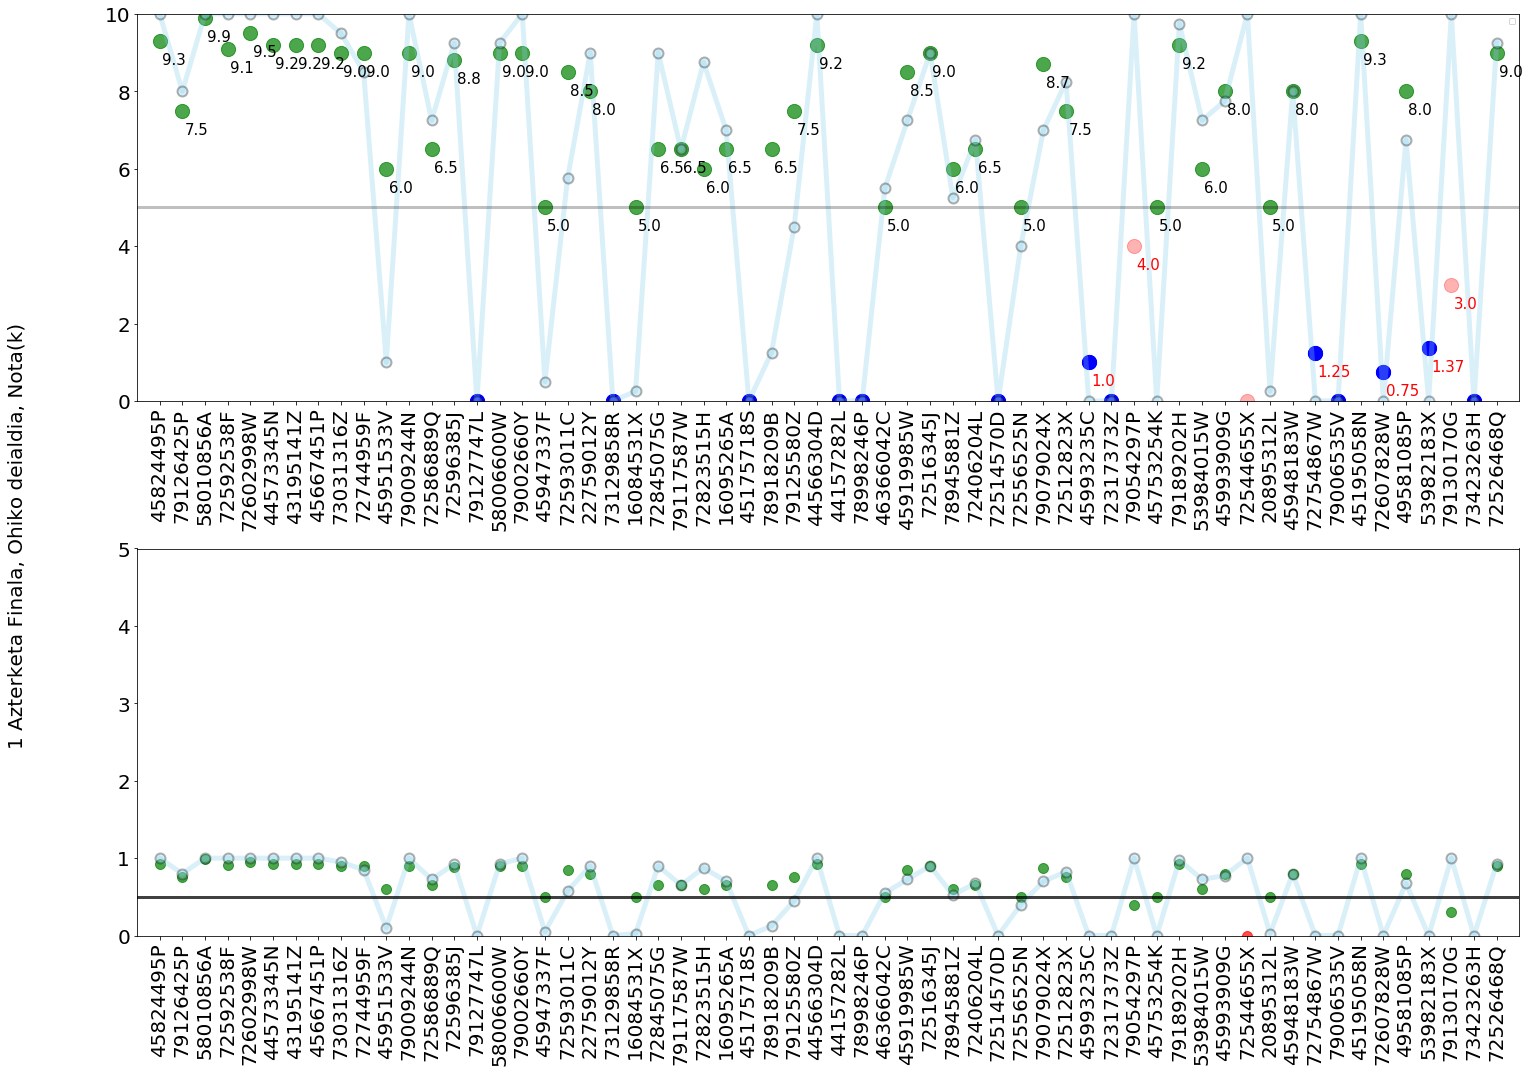

In [32]:
fig_notak_Azterketa_1Flabel, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,15), )
ax0, ax1 = axes.flat

#fig_notak_AzterketatxoaIII.text(0.5, 0.08,  r'$Ikasleak$', size=20 , ha='center')
fig_notak_Azterketa_1Flabel.text(-0.06, 0.5, r'1 Azterketa Finala, Ohiko deialdia, Nota(k)', size=20, va='center', rotation='vertical')


ax0.tick_params(axis='y', labelsize=20)

ax0.set_xlim(0.0, max(ikasleak_counter)+1)
ax0.set_ylim(0.0 ,10.0) 
# x_ticklabels with DNI
ax0.set_xticklabels(ikasleak_labels, rotation='vertical', size=20)
# x_ticklabels with names
#ax0.set_xticklabels([j+' '+i[3] for i,j in zip(ikasleak_data[:],ikasleak_labels)], rotation='vertical', size=10)
ax0.xaxis.set_ticks(ikasleak_counter)

ax1.tick_params(axis='y', labelsize=20)

ax1.set_xlim(0.0, max(ikasleak_counter)+1)
ax1.set_ylim(0.0, 5.0) 
ax1.set_xticklabels(ikasleak_labels, rotation='vertical', size=20)
#ax1.set_xticklabels([i[3] for i in ikasleak_data[:]], rotation='vertical', size=10)
ax1.xaxis.set_ticks(ikasleak_counter)

#ax0.grid(True)

ax0.legend(prop={'size': 8})

ax0.plot(ikasleak_counter, label_ari_dena, '-o', **paramsParDena)
for i in ikasleak_counter:
    if ikasleak_label[i-1][4][0] == 1:
        if label_notak[i-1,1] >= 5.0:
            ax0.scatter(label_notak[i-1,0], label_notak[i-1,1], s=200, color='g', alpha=0.7)
            ax0.plot([label_notak[i-1][0]], [label_notak[i-1][0]], 
                     color ='blue',  linewidth=1.5, linestyle="--")
        else:
            ax0.scatter(label_notak[i-1,0], label_notak[i-1,1], s=200, color='r', alpha=0.3)
    elif ikasleak_label[i-1][4][0] == 0:
        ax0.scatter(label_notak[i-1,0], label_notak[i-1,1], s=200, color='k', alpha=1.0)
    else:
        ax0.scatter(label_notak[i-1,0], label_notak[i-1,1], s=200, color='b', alpha=1.0)

ax1.plot(ikasleak_counter, [i/10.0   for i in label_ari_dena], '-o', **paramsParDena)
for i in ikasleak_counter:
    if ikasleak_label[i-1][4][0] == 1:
        if label_notak[i-1,1]/10.0 == 0.0:
            ax1.scatter((label_notak[i-1,0]), label_notak[i-1,1]/10.0, s=100, color='r', alpha=0.7)
        else:
            ax1.scatter(label_notak[i-1,0], label_notak[i-1,1]/10.0, s=100, color='g', alpha=0.7)
    elif ikasleak_label[i-1][4][0] == 0:
        ax0.scatter(label_notak[i-1,0], label_notak[i-1,1], s=200, color='k', alpha=1.0)
    else:
        ax0.scatter(label_notak[i-1,0], label_notak[i-1,1], s=200, color='b', alpha=1.0)
        
        
ax0.axhline(y=5.0, xmin=0.00, xmax=1.00, linewidth=3, color = 'k', alpha=0.25)
ax1.axhline(y=0.5, xmin=0.00, xmax=1.00, linewidth=3, color = 'k', alpha=0.75)


for i in ikasleak_counter:
    if label_notak[i-1,1] != 0.0:
        if label_notak[i-1,1] >= 5.0:
            ax0.annotate('%s' % label_notak[i-1,1], xy=(label_notak[i-1,0], label_notak[i-1,1]), 
                 xytext=(label_notak[i-1,0]+0.1, label_notak[i-1,1]-0.6), size=15, color='k')
        else:
            ax0.annotate('%s' % label_notak[i-1,1], xy=(label_notak[i-1,0], label_notak[i-1,1]), 
                 xytext=(label_notak[i-1,0]+0.1, label_notak[i-1,1]-0.6), size=15, color='r')

plt.tight_layout()
plt.savefig('Notak_'+label+'.pdf')


In [33]:
file_handler_write = open(label + '_notak.txt', 'w')

not_present_counter = 0
for i in ikasleak_counter:
    if ikasleak_label[i-1][4][0] == 1:
        file_handler_write.write("{:2d}".format(i) + \
                                 '  ' + ikasleak_labels[i-1] + '  ' + \
                                 "{:5.2f}".format(label_notak[i-1][1])+',  \n')
        if label_notak[i-1][1] >= 5.0:
            print "{:2d}".format(i) + \
                                 '  ' + ikasleak_labels[i-1] + '  ' + \
                                 "{:5.2f}".format(label_notak[i-1][1])
        else:
            print "{:2d}".format(i) + \
                                 '  ' + ikasleak_labels[i-1] + '  ' + \
                                 '\x1b[1;41m' + \
                                  "{:5.2f}".format(label_notak[i-1][1]) +\
                                  '\x1b[0m'
    elif ikasleak_label[i-1][4][0] == 0:
        file_handler_write.write("{:2d}".format(i) + '  ' + ikasleak_labels[i-1] + '  ' + "{:5.2f}".format(0.0) + ',  \n')
#        print "{:2d}".format(i) + '  ' + \
#                                 '\x1b[1;35m'+str(ikasleak_labels[i-1]) + '  ' + "%s" %'_____'+'\x1b[0m'
        print "{:2d}".format(i) + \
                                 '  ' + ikasleak_labels[i-1] + '  ' + \
                                 '\x1b[1;41m' + \
                                  "{:5.2f}".format(0.0) +\
                                  '\x1b[0m'


                                 
        not_present_counter += 1
        
    else:
        file_handler_write.write("{:2d}".format(i) + '  ' + ikasleak_labels[i-1] + '  ' + "{:5.2f}".format(20.0) + ',  \n')
#        print "{:2d}".format(i) + '  ' + \
#                                 '\033[36m'+str(ikasleak_labels[i-1]) + '  ' + "%s" %'_____'+'\033[0m'
        print "{:2d}".format(i) + \
                                 '  ' '\033[36m' + ikasleak_labels[i-1] + '  ' + \
                                 '\033[36m' + \
                                  "{:5.2f}".format(20.0) +\
                                  '\033[0m'
                                 
        not_present_counter += 1
        
        
file_handler_write.write('\n'*2)
file_handler_write.write(' '*10 + 'Ez dira %s ikasle etorri' % str(not_present_counter) + '\n'*2)
file_handler_write.write(' '*10 + 'Batez besteko nota da: %s' \
                         % str( round(sum([i[1] for i in label_notak ]) \
                                / (len(ikasleak_counter) - not_present_counter), 2) ) \
                         + '\n'*2)

file_handler_write.close()

print '\n'*2
print ' '*10 + 'Ez dira %s ikasle etorri' % str(not_present_counter) + '\n'*2
print ' '*10 + 'Batez besteko nota da: %s' \
                         % str( round(sum([i[1] for i in label_notak ]) \
                                / (len(ikasleak_counter) - not_present_counter), 2) ) \
                         + '\n'*2


 1  45824495P   9.30
 2  79126425P   7.50
 3  58010856A   9.90
 4  72592538F   9.10
 5  72602998W   9.50
 6  44573345N   9.20
 7  43195141Z   9.20
 8  45667451P   9.20
 9  73031316Z   9.00
10  72744959F   9.00
11  45951533V   6.00
12  79009244N   9.00
13  72586889Q   6.50
14  72596385J   8.80
15  79127747L  20.00
16  58006600W   9.00
17  79002660Y   9.00
18  45947337F   5.00
19  72593011C   8.50
20  22759012Y   8.00
21  73129858R  20.00
22  16084531X   5.00
23  72845075G   6.50
24  79117587W   6.50
25  72823515H   6.00
26  16095265A   6.50
27  45175718S  20.00
28  78918209B   6.50
29  79125580Z   7.50
30  44566304D   9.20
31  44157282L  20.00
32  78998246P  20.00
33  46366042C   5.00
34  45919985W   8.50
35  72516345J   9.00
36  78945881Z   6.00
37  72406204L   6.50
38  72514570D  20.00
39  72556525N   5.00
40  79079024X   8.70
41  72512823X   7.50
42  45993235C  20.00
43  72317373Z  20.00
44  79054297P   4.00
45  45753254K   5.00
46  79189202H   9.20
47  53984015W   6.00
48  45993909G

In [34]:
from collections import Counter

class_2017_2018_label = 'class_2017_2018_' + label 
sorted_notak_label    = 'sorted_notak_' + label
notak_label_banaketa  = 'notak_' + label + '_banaketa'

class_2017_2018_label = {}

for i, j, k in zip(label_notak, ikasleak_labels, ikasleak_label):
    
    class_2017_2018_label[j+'_'+str(k[4][0])] = "{:5.2f}".format(i[1])

sorted_notak_label = np.array(sorted(class_2017_2018_label.items(), key=lambda x: (x[1], x[0][-1]), reverse=True))

notak_label_banaketa = sorted([[k,v]  for [k, v] in \
        Counter(sorted([float(i[1]) for i in sorted_notak_label], reverse=True)).items()], reverse=True)

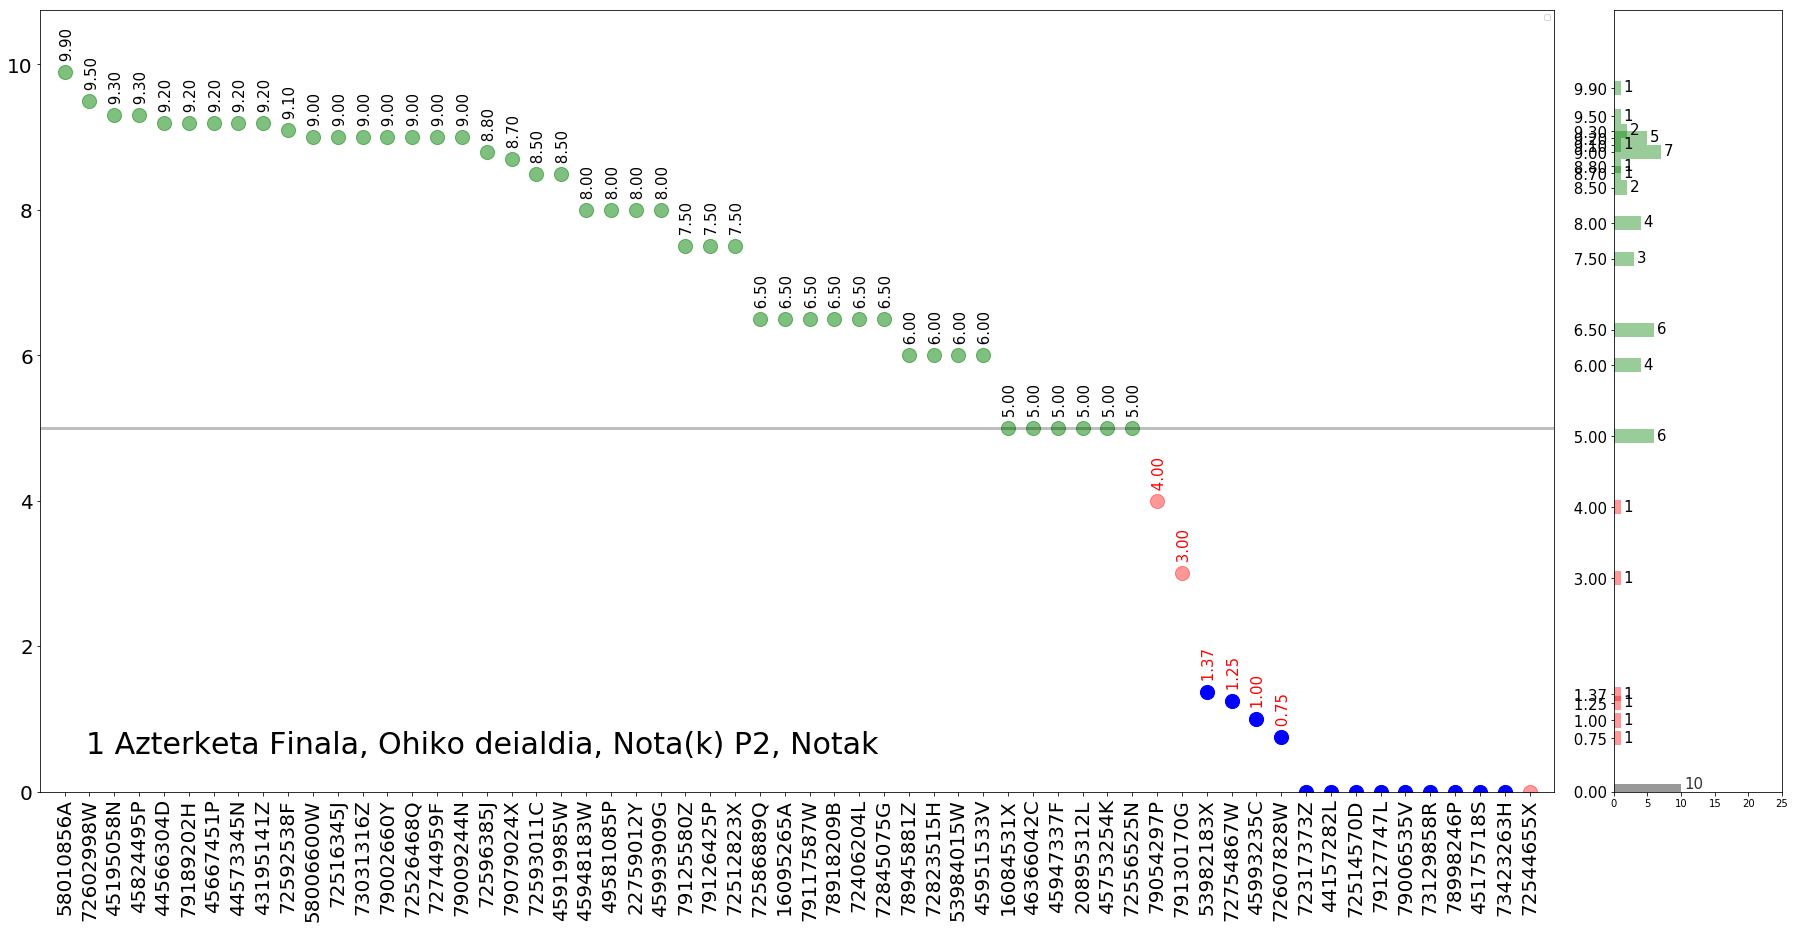

In [35]:
from matplotlib import gridspec

fig_notak_Azterketatxolabel_ordered = 'fig_notak_1_F' + label + '_ordered'

fig_notak_Azterketatxolabel_ordered = plt.figure(figsize=(25,13), );
gs = gridspec.GridSpec(1, 2, width_ratios=[9, 1]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

fig_notak_Azterketatxolabel_ordered.text(0.05, 0.20, r'1 Azterketa Finala, Ohiko deialdia, Nota(k) ' + label + ', Notak', size=30, va='center')

ax0.tick_params(axis='y', labelsize=20)

ax0.set_xlim(0.0, max(ikasleak_counter)+1)
ax0.set_ylim(0.0 ,10.75) 
ax0.set_xticklabels([k[:][0:9] for k in sorted_notak_label[:,0]], rotation='vertical', size=20)
ax0.xaxis.set_ticks(ikasleak_counter)

ax0.legend(prop={'size': 8})

ax1.set_xlim(0.0, 25.0)
ax1.set_ylim(0.0, 11.0)
ax1.yaxis.set_ticks([i[0] for i in notak_label_banaketa])
ax1.set_yticklabels(["{:5.2f}".format(i[0]) for i in notak_label_banaketa], size=15)

colors_bar = ['g' if i[0] >= 5.0 else 'r' if i[0] > 0.0 else 'k' for i in notak_label_banaketa ]

ax1.barh([i[0] for i in notak_label_banaketa], [i[1] for i in notak_label_banaketa],
           0.2, align='center', alpha=0.4, color = colors_bar)

for i in notak_label_banaketa:
    if i[0] > 0.0:
        ax1.annotate('%s' % i[1], xy=(i[1], i[0]), xytext=(i[1]+0.4, i[0]-0.05), size=15, color='k')
    else:
        ax1.annotate('%s' % i[1], xy=(i[1], i[0]), xytext=(i[1]+0.4, i[0]+0.05), size=15, color='k', alpha=0.8)
        
for i in ikasleak_counter:
    if float(sorted_notak_label[:][i-1][0][-1]) == 1:
        if float(sorted_notak_label[i-1,1]) >= 5.0:
            ax0.scatter(label_notak[i-1,0], float(sorted_notak_label[i-1,1]), s=200, color='g', alpha=0.5)
        else:
            ax0.scatter(label_notak[i-1,0], float(sorted_notak_label[i-1,1]), s=200, color='r', alpha=0.4)
            
    elif float(sorted_notak_label[:][i-1][0][-1]) == 0:
        ax0.scatter(label_notak[i-1,0], float(sorted_notak_label[i-1,1]), s=200, color='k', alpha=1.0)
        
    else:
        ax0.scatter(label_notak[i-1,0], float(sorted_notak_label[i-1,1]), s=200, color='b', alpha=1.0)

ax0.axhline(y=5.0, xmin=0.00, xmax=1.00, linewidth=3, color = 'k', alpha=0.25)

for i in ikasleak_counter:
    if float(sorted_notak_label[i-1,1]) != 0.0:
        if float(sorted_notak_label[i-1,1]) == 10.0:
            ax0.annotate('%s' % sorted_notak_label[i-1,1], xy=(label_notak[i-1,0], float(sorted_notak_label[i-1,1])), 
                 xytext=(label_notak[i-1,0]-0.2, float(sorted_notak_label[i-1,1])+0.58), 
                         size=15, color='k', rotation='vertical')
        elif float(sorted_notak_label[i-1,1]) >= 5.0:
            ax0.annotate('%s' % sorted_notak_label[i-1,1], xy=(label_notak[i-1,0], float(sorted_notak_label[i-1,1])), 
                 xytext=(label_notak[i-1,0]-0.2, float(sorted_notak_label[i-1,1])+0.45), 
                         size=15, color='k', rotation='vertical')
        elif float(sorted_notak_label[i-1,1]) > 0.0:
            ax0.annotate('%s' % sorted_notak_label[i-1,1], xy=(label_notak[i-1,0], float(sorted_notak_label[i-1,1])), 
                 xytext=(label_notak[i-1,0]-0.2, float(sorted_notak_label[i-1,1])+0.45), 
                         size=15, color='r', rotation='vertical')

plt.tight_layout()

#plt.savefig('Notak_' + label + '_st.pdf')



# Hauxe mantenduko dut P2_ebaluazioa notebook-etik

# P2_A12345_EmaitzakAzterketa notebook-etik ateratako taula, gehi 2P azterketa partzialean joan direnen notak eta joan ez direnen moldatutako notak

In [ ]:
                                                            P1A1     P1A2     P1A3     P1A4      P1A1_5  *0.4    AP1   AP1_bir  P1_not P1_not_bir   P2A1     P2A2     P2A3     P2A4      P2A5      P2A1_5  *0.5 P2A1_5_bir   AP2    *0.5  AP2_bir
'             alonso_ajuria_kerman_45824495P_',  '01',   [' 9.75', ' 9.75', ' 8.00', '10.00'] , [ 9.38,  3.75], [8.33, 8.50,    8.75,    8.75],   ['10.00', '10.00', '10.00', '10.00', ' 8.50'],  [ 9.70,  4.85,  5.00],   [ 10.00,  5.00,  5.00],
'           alvarez_arguinano_ivan_79126425P_',  '02',   [' 2.50', ' 9.50', ' 6.00', ' 9.00'] , [ 6.75,  2.70], [3.67, 3.75,    4.90,    5.00],   [' 7.00', ' 9.00', ' 4.50', ' 9.00', ' 8.75'],  [ 7.65,  3.83,  4.00],   [  8.00,  4.00,  4.00],
'       barrainkua_aguirre_ainhize_58010856A_',  '03',   [' 9.75', '10.00', ' 9.25', '10.00'] , [ 9.75,  3.90], [9.67, 9.75,    9.70,    9.75],   ['10.00', '10.00', ' 9.75', '10.00', ' 9.75'],  [ 9.90,  4.95,  5.00],   [ 10.00,  5.00,  5.00],
'             elortegi_garcia_iker_72592538F_',  '04',   [' 8.25', '10.00', ' 8.75', '10.00'] , [ 9.25,  3.70], [7.33, 7.50,    8.10,    8.25],   ['10.00', '10.00', ' 9.75', '10.00', ' 9.75'],  [ 9.90,  4.95,  5.00],   [ 10.00,  5.00,  5.00],
'         etxeberria_etxaniz_malen_72602998W_',  '05',   [' 7.25', ' 9.50', ' 9.50', '10.00'] , [ 9.06,  3.62], [8.67, 8.75,    8.83,    9.00],   ['10.00', '10.00', '10.00', ' 9.50', ' 9.50'],  [ 9.80,  4.90,  5.00],   [ 10.00,  5.00,  5.00],
'              gabirondo_lopez_jon_44573345N_',  '06',   [' 3.75', ' 9.50', ' 9.25', '10.00'] , [ 8.12,  3.25], [8.67, 8.75,    8.45,    8.50],   ['10.00', '10.00', ' 9.00', '10.00', ' 9.75'],  [ 9.75,  4.88,  5.00],   [ 10.00,  5.00,  5.00],
'                grao_sukia_martin_43195141Z_',  '07',   [' 8.00', ' 9.50', ' 9.25', '10.00'] , [ 9.19,  3.67], [8.00, 8.00,    8.47,    8.50],   [' 9.00', '10.00', ' 9.75', '10.00', ' 9.75'],  [ 9.70,  4.85,  5.00],   [ 10.00,  5.00,  5.00],
'            ibarrondo_lopez_ruben_45667451P_',  '08',   [' 4.25', ' 9.25', ' 9.50', ' 9.50'] , [ 8.12,  3.25], [8.67, 8.75,    8.45,    8.50],   ['10.00', '10.00', ' 8.75', '10.00', ' 8.50'],  [ 9.45,  4.72,  5.00],   [ 10.00,  5.00,  5.00],
'              irizar_landa_martin_73031316Z_',  '09',   [' 6.25', '10.00', ' 9.50', ' 8.25'] , [ 8.50,  3.40], [7.00, 7.00,    7.60,    7.75],   [' 9.00', ' 9.00', ' 8.50', '10.00', ' 8.50'],  [ 9.00,  4.50,  4.50],   [  9.50,  4.75,  4.75],
'martinez_de_aguirre_jokisch_benat_72744959F_',  '10',   [' 7.50', '10.00', ' 9.50', ' 9.50'] , [ 9.12,  3.65], [5.33, 5.50,    6.85,    7.00],   ['10.00', '10.00', ' 9.25', '10.00', ' 9.00'],  [ 9.65,  4.83,  5.00],   [  8.50,  4.25,  4.25],
'              oguiza_martinez_jon_45951533V_',  '11',   [' 7.25', '10.00', ' 7.75', ' 8.75'] , [ 8.44,  3.38], [6.00, 6.00,    6.97,    7.00],   [' 8.00', '10.00', ' 8.75', ' 8.75', ' 9.75'],  [ 9.05,  4.52,  4.50],   [  1.00,  0.50,  0.50],
'              ormaza_zulueta_naia_79009244N_',  '12',   [' 9.00', '10.00', '10.00', ' 9.50'] , [ 9.62,  3.85], [7.00, 7.00,    8.05,    8.25],   ['10.00', '10.00', ' 6.25', '10.00', ' 9.25'],  [ 9.10,  4.55,  4.75],   [ 10.00,  5.00,  5.00],
'           pedraza_aguirre_xabier_72586889Q_',  '13',   [' 5.50', ' 9.25', ' 7.75', ' 9.50'] , [ 8.00,  3.20], [2.00, 2.00,    4.40,    4.50],   [' 8.00', ' 8.00', ' 4.75', ' 6.00', ' 8.50'],  [ 7.05,  3.53,  3.50],   [  7.25,  3.62,  3.75],
'        rodriguez_escalante_asier_72596385J_',  '14',   [' 7.00', ' 9.50', '10.00', ' 9.25'] , [ 8.94,  3.58], [6.33, 6.50,    7.37,    7.50],   [' 7.50', ' 9.00', '10.00', '10.00', ' 8.50'],  [ 9.00,  4.50,  4.50],   [  9.25,  4.62,  4.75],
'              agirre_olaeta_asier_79127747L_',  '15',   ['20.00', '20.00', '20.00', '20.00'] , [     ,      ], [                   ,        ],   ['20.00', '20.00', '20.00', '20.00', '20.00'] , [     ,      ,      ],   [  0.00,  0.00,  0.00], 
'    alana_alvarez_de_eulate_aitor_58006600W_',  '16',   [' 8.00', ' 9.50', ' 8.75', '10.00'] , [ 9.06,  3.62], [8.67, 8.75,    8.83,    9.00],   [' 9.00', ' 7.00', ' 4.75', ' 9.00', ' 8.50'],  [ 7.65,  3.83,  4.00],   [  9.25,  4.62,  4.75],
'              aldama_atxurra_unai_79002660Y_',  '17',   [' 4.50', ' 9.50', ' 9.50', '10.00'] , [ 8.38,  3.35], [7.00, 7.00,    7.55,    7.75],   ['10.00', '10.00', ' 9.00', '10.00', ' 9.50'],  [ 9.70,  4.85,  5.00],   [ 10.00,  5.00,  5.00],
'          aldekoa_nabaridas_eneko_45947337F_',  '18',   [' 3.00', ' 9.50', ' 4.75', ' 9.50'] , [ 6.69,  2.67], [5.00, 5.00,    5.68,    5.75],   [' 9.00', ' 9.00', ' 7.00', ' 6.50', ' 9.25']   [ 8.15,* 4.08,  4.25],   [  0.50,  0.25,  0.25],
'           amezua_monasterio_oier_72593011C_',  '19',   [' 4.00', ' 8.75', ' 7.75', ' 9.25'] , [ 7.44,  2.97], [8.00, 8.00,    7.78,    8.00],   [' 9.75', '10.00', ' 8.25', ' 8.75', ' 8.75'],  [ 9.10,  4.55,  4.75],   [  5.75,  2.87,  3.00],
'            anzola_martinez_mikel_22759012Y_',  '20',   [' 5.75', ' 9.50', ' 6.00', ' 8.75'] , [ 7.50,  3.00], [5.33, 5.50,    6.20,    6.25],   [' 9.00', '10.00', ' 7.50', ' 7.75', ' 8.50'],  [ 8.55,  4.27,  4.50],   [  9.00,  4.50,  4.50],
'               araiz_michel_julen_73129858R_',  '21',   ['20.00', '20.00', '20.00', '20.00'] , [     ,      ], [                   ,        ],   ['20.00', '20.00', '20.00', '20.00', '20.00'] , [     ,      ,      ],   [  0.00,  0.00,  0.00],
'        arechabaleta_gallego_kepa_16084531X_',  '22',   [' 4.25', ' 9.25', ' 6.50', ' 9.25'] , [ 7.31,  2.92], [5.00, 5.00,    5.93,    6.00],   [' 7.50', ' 9.00', ' 7.50', ' 7.50', ' 7.75'],  [ 7.85,  3.92,  4.00],   [  0.25,  0.12,  0.25],
'             arrieta_umerez_benat_72845075G_',  '23',   [' 4.50', ' 9.50', ' 3.00', ' 6.25'] , [ 5.81,  2.33], [0.00, 0.00,    2.33,    2.50],   [' 9.00', '10.00', ' 6.00', ' 8.25', ' 8.00'],  [ 8.25,  4.12,  4.25],   [  9.00,  4.50,  4.50],
'         bilbao_barrenechea_inigo_79117587W_',  '24',   [' 4.25', ' 7.75', ' 5.75', ' 4.25'] , [ 5.50,  2.20], [5.33, 5.50,    5.40,    5.50],   [' 7.00', ' 8.00', ' 5.25', ' 7.50', ' 7.50'],  [ 7.05,  3.52,  3.75],   [  6.50,  3.25,  3.25],
'       cabodevilla_antonana_asier_72823515H_',  '25',   [' 2.50', ' 6.00', ' 5.50', ' 8.25'] , [ 5.56,  2.22], [1.67, 1.75,    3.23,    3.25],   [' 7.50', ' 9.00', ' 6.00', ' 6.75', ' 7.00'],  [ 7.05,  3.63,  3.75],   [  8.75,  4.37,  4.50],
'             ceberio_basanez_ibai_16095265A_',  '26',   [' 1.00', ' 6.25', ' 3.75', ' 7.50'] , [ 4.62,  1.85], [5.00, 5.00,    4.85,    5.00],   [' 8.00', '10.00', ' 7.50', '10.00', ' 7.25'],  [ 8.55,  4.27,  4.50],   [  7.00,  3.50,  3.50],
'              costa_valencia_alex_45175718S_',  '27',   ['20.00', '20.00', '20.00', '20.00'] , [     ,      ], [                   ,        ],   ['20.00', '20.00', '20.00', '20.00', '20.00'] , [     ,      ,      ],   [  0.00,  0.00,  0.00], 
'               del_rio_ruiz_aitor_78918209B_',  '28',   [' 5.00', ' 9.50', ' 9.50', '10.00'] , [ 8.50,  3.40], [7.00, 7.00,    7.60,    7.75],   ['10.00', ' 8.00', ' 9.75', '10.00', ' 8.50'],  [ 9.25,  4.62,  4.75],   [  1.25,  0.62,  0.75],
'             delgado_enales_inigo_79125580Z_',  '29',   [' 6.25', ' 9.25', ' 6.75', ' 9.50'] , [ 7.94,  3.17], [7.00, 7.00,    7.38,    7.50],   [' 9.50', ' 9.00', ' 7.00', '10.00', ' 7.75'],  [ 8.65,  4.33,  4.50],   [  4.50,  2.25,  2.25],
'         dorronsoro_larbide_aritz_44566304D_',  '30',   [' 5.75', ' 9.50', ' 9.50', '10.00'] , [ 8.69,  3.47], [8.33, 8.50,    8.47,    8.50],   [' 9.00', '10.00', ' 9.75', '10.00', ' 9.75'],  [ 9.70,  4.85,  5.00],   [ 10.00,  5.00,  5.00],
'             epelde_martija_inigo_44157282L_',  '31',   ['20.00', '20.00', '20.00', '20.00'] , [     ,      ], [                   ,        ],   ['20.00', '20.00', '20.00', '20.00', '20.00'] , [     ,      ,      ],   [  0.00,  0.00,  0.00],
'          etxebarria_erdoiza_jone_78998246P_',  '32',   ['20.00', '20.00', '20.00', '20.00'] , [     ,      ], [                   ,        ],   ['20.00', '20.00', '20.00', '20.00', '20.00'] , [     ,      ,      ],   [  0.00,  0.00,  0.00], 
'          garcia_ibarluzea_markel_46366042C_',  '33',   [' 2.50', ' 9.50', ' 6.00', ' 5.50'] , [ 5.88,  2.35], [2.00, 2.00,    3.55,    3.75],   [' 8.00', '10.00', ' 4.25', ' 7.50', ' 6.00'],  [ 7.15,  3.58,  3.75],   [  5.50,  2.75,  2.75],
'          garcia_marcaida_beatriz_45919985W_',  '34',   [' 7.25', ' 9.50', ' 5.25', ' 9.00'] , [ 7.75,  3.10], [9.00, 9.00,    8.50,    8.50],   [' 9.00', '10.00', ' 7.50', ' 7.75', ' 8.50'],  [ 8.55,  4.27,  4.50],   [  7.25,  3.62,  3.75],
'                hayet_otero_miren_72516345J_',  '35',   [' 3.25', ' 9.50', ' 7.00', ' 8.75'] , [ 7.12,  2.85], [7.67, 7.75,    7.45,    7.50],   [' 9.00', ' 9.00', ' 9.25', '10.00', ' 8.00'],  [ 9.05,  4.53,  4.75],   [  9.00,  4.50,  4.50],
'           hernandez_bravo_joseba_78945881Z_',  '36',   [' 3.75', ' 9.00', ' 7.00', ' 8.00'] , [ 6.94,  2.77], [3.67, 3.75,    4.98,    5.00],   [' 9.00', ' 8.00', ' 8.00', ' 5.00', ' 4.50'],  [ 6.90,  3.45,  3.50],   [  5.25,  2.62,  2.75],
'             hierro_rivero_adrian_72406204L_',  '37',   [' 5.75', ' 8.75', ' 5.50', ' 5.50'] , [ 6.38,  2.55], [5.67, 5.75,    5.95,    6.00],   [' 7.00', ' 7.50', ' 4.00', ' 4.75', ' 2.75'],  [ 5.20,  2.60,  2.75],   [  6.75,  3.37,  3.50],
'            izagirre_madrid_irati_72514570D_',  '38',   ['20.00', '20.00', '20.00', '20.00'] , [     ,      ], [                   ,        ],   ['20.00', '20.00', '20.00', '20.00', '20.00'] , [     ,      ,      ],   [  0.00,  0.00,  0.00],
'               lasarte_mugica_jon_72556525N_',  '39',   [' 3.50', ' 6.00', ' 5.00', ' 4.00'] , [ 4.62,  1.85], [4.33, 4.50,    4.45,    4.50],   [' 7.00', ' 7.50', ' 6.50', ' 6.75', ' 6.00'],  [ 6.75,  3.38,  3.50],   [  4.00,  2.00,  2.00],
'      lejonagoitia_garmendia_lide_79079024X_',  '40',   [' 7.25', '10.00', '10.00', '10.00'] , [ 9.31,  3.73], [6.67, 6.75,    7.73,    7.75],   [' 9.00', ' 8.00', ' 9.00', ' 8.00', ' 7.75'],  [ 8.35,  4.18,  4.50],   [  7.00,  3.50,  3.50],
'             lekuona_ugalde_eneko_72512823X_',  '41',   [' 3.00', ' 9.25', ' 5.00', ' 9.75'] , [ 6.75,  2.70], [4.67, 4.75,    5.50,    5.50],   [' 8.00', ' 7.00', ' 7.75', ' 8.75', ' 7.00'],  [ 7.70,  3.85,  4.00],   [  8.25,  4.12,  4.25],
'               llona_carbajo_unai_45993235C_',  '42',   [' 1.25', ' 8.25', ' 3.00', ' 6.00'] , [ 4.62,  1.85], [0.00, 0.00,    1.85,    2.00],   [' 8.50', ' 7.00', ' 8.75', ' 5.25', ' 2.75'],  [ 6.45,  3.22,  3.50],   [  0.00,  0.00,  0.00],
'             lopez_zorrilla_asier_72317373Z_',  '43',   ['20.00', '20.00', '20.00', '20.00'] , [     ,      ], [                   ,        ],   ['20.00', '20.00', '20.00', '20.00', '20.00'] , [     ,      ,      ],   [  0.00,  0.00,  0.00],
'               monge_lorenzo_nahi_79054297P_',  '44',   [' 1.00', ' 9.00', ' 2.75', ' 5.25'] , [ 4.50,  1.80], [2.00, 2.00,    3.00,    3.00],   [' 8.50', ' 7.00', ' 5.00', ' 3.75', ' 2.75'],  [ 5.40,  2.70,  2.75],   [  4.00,  2.00,  2.00],
'           ocerin_rodriguez_ander_45753254K_',  '45',   [' 3.75', ' 7.00', ' 5.50', ' 8.25'] , [ 6.12,  2.45], [6.67, 6.75,    6.45,    6.50],   [' 7.00', ' 8.00', ' 5.75', ' 9.00', ' 6.50'],  [ 7.25,  3.62,  3.75],   [  0.00,  0.00,  0.00],
'             ondaro_mallea_lurdes_79189202H_',  '46',   [' 9.50', ' 9.50', ' 7.50', ' 9.75'] , [ 9.06,  3.62], [7.67, 7.75,    8.23,    8.25],   ['10.00', '10.00', ' 8.75', ' 6.75', ' 8.50'],  [ 8.80,  4.40,  4.50],   [  9.75,  4.87,  5.00],
'                 oribe_cid_endika_53984015W_',  '47',   [' 1.25', ' 9.00', ' 7.25', ' 9.50'] , [ 6.75,  2.70], [2.33, 2.50,    4.10,    4.25],   [' 8.00', '10.00', ' 5.00', ' 5.50', ' 6.75'],  [ 7.05,  3.52,  3.50],   [  7.25,  3.62,  3.75],
'        ortego_larrazabal_maialen_45993909G_',  '48',   [' 5.75', ' 9.50', ' 8.75', '10.00'] , [ 8.50,  3.40], [5.00, 5.00,    6.40,    6.50],   ['10.00', ' 9.00', ' 7.00', ' 9.00', ' 7.50'],  [ 8.50,  4.25,  4.25],   [  7.75,  3.87,  4.00],
'            otamendi_loibide_unai_72544655X_',  '49',   ['20.00', '20.00', '20.00', '20.00'] , [     ,      ], [                   ,        ],   ['20.00', '20.00', '20.00', '20.00', '20.00'] , [     ,      ,      ],   [  0.00,  0.00,  0.00],,
'              perez_arrieta_mikel_20895312L_',  '50',   [' 2.00', '10.00', ' 8.75', '10.00'] , [ 7.69,  3.08], [4.67, 4.75,    5.88,    6.00],   ['10.00', ' 8.00', ' 5.00', ' 8.00', ' 8.50'],  [ 7.90,  3.95,  4.00],   [  0.25,  0.12,  0.25],
'              perez_delgado_inigo_45948183W_',  '51',   [' 5.50', ' 9.25', ' 5.00', ' 7.75'] , [ 6.88,  2.75], [5.67, 5.75,    6.15,    6.25],   ['10.00', ' 9.00', ' 6.25', '10.00', ' 8.25'],  [ 8.70,  4.35,  4.35],   [  8.00,  4.00,  4.00],
'            plazaola_acosta_julen_72754867W_',  '52',   [' 0.75', ' 9.25', ' 5.75', ' 8.75'] , [ 6.12,  2.45], [0.00, 0.00,    2.45,    2.50],   [' 9.00', ' 8.00', ' 5.50', ' 7.00', ' 8.00'],  [ 7.50,  3.75,  3.75],   [  0.00,  0.00,  0.00],
'        ruiz_colmenares_jon_ander_79006535V_',  '53',   ['20.00', '20.00', '20.00', '20.00'] , [     ,      ], [                   ,        ],   ['20.00', '20.00', '20.00', '20.00', '20.00'] , [     ,      ,      ],   [  0.00,  0.00,  0.00],
'         salaverria_jimenez_inaki_45195058N_',  '54',   [' 1.75', ' 9.25', ' 7.00', ' 9.25'] , [ 6.81,  2.73], [0.00, 0.00,    8.72,    8.75],   ['10.00', ' 9.00', ' 9.50', ' 9.50', ' 9.75'],  [ 9.55,  4.77,  4.75],   [ 10.00,  5.00,  5.00],
'          sancerni_benitez_imanol_72607828W_',  '55',   [' 1.75', ' 5.75', ' 4.00', ' 3.00'] , [ 3.62,  1.45], [0.00, 0.00,    1.45,    1.50],   [' 7.00', ' 7.00', ' 3.00', ' 4.50', ' 0.00'],  [ 4.30,  2.15,  2.25],   [  0.00,  0.00,  0.00],
'             sanchez_merino_borja_49581085P_',  '56',   [' 4.00', ' 6.75', ' 7.25', ' 9.25'] , [ 6.81,  2.73], [7.67, 7.75,    7.33,    7.50],   [' 8.00', ' 8.00', ' 9.50', ' 9.25', ' 7.25'],  [ 8.40,  4.20,  4.25],   [  6.75,  3.37,  3.50],
'             sasiain_casado_amaia_53982183X_',  '57',   [' 4.50', ' 7.50', ' 6.75', ' 6.50'] , [ 6.31,  2.52], [0.00, 0.00,    2.53,    2.75],   [' 9.00', ' 0.00', ' 5.50', ' 7.00', ' 0.00'],  [ 4.30,  2.15,  2.25],   [  0.00,  0.00,  0.00],
'               soto_urruela_asier_79130170G_',  '58',   ['20.00', '20.00', '20.00', '20.00'] , [     ,      ], [                   ,        ],   [' 9.00', '10.00', ' 6.75', ' 9.00', ' 5.00'],  [ 7.95,  3.98,  4.00],   [  3.50,  1.75,  2.00],
'      urdangarain_legarreta_inigo_73423263H_',  '59',   ['20.00', '20.00', '20.00', '20.00'] , [     ,      ], [                   ,        ],   ['20.00', '20.00', '20.00', '20.00', '20.00'] , [     ,      ,      ],   [  0.00,  0.00,  0.00],
'             urio_garmendia_ander_72526468Q_',  '60',   [' 6.25', ' 9.50', ' 9.00', '10.00'] , [ 8.69,  3.48], [7.00, 7.00,    7.68,    7.75],   [' 9.00', '10.00', ' 8.75', '10.00', ' 8.00'],  [ 9.15,  4.58,  4.75],   [  9.25,  4.62,  4.75],

* bidalitako nota 4.80 izan da
  aldatu diot 5.00, horrela ez du azterketara etorri behar
  horretarako P2_A3 nota aldatu diot 5.00 -> 7.00
  horrela, 1.00era eskalatuta, diferentzia 0.20 bihurtzen da, osta-osta behar duena
    
  hurrengo gelaxkan dago bidalitako notak, posta elektronikoz
  hurrengoan daude definitiboak, _18_Aldekoa_Nabaridas nota 5.00 jarrita
    


In [ ]:
cursos = np.array([['2011-2012', '22'], 
                   ['2012-2013', '29'],
                   ['2013-2014', '47'],
                   ['2014-2015', '51'],
                   ['2015-2016', '33'],
                   ['2016-2017', '47'],
                   ['2017-2018', '60']])

In [ ]:
len(cursos)

In [ ]:
cursos_counter = range(1, len(cursos)+1)

fig_cursos, axes = plt.subplots(ncols=1, nrows=1, figsize=(12,8), );
ax0 = axes


fig_cursos.text(0.15, 0.20, r'Matriculado/as', size=30, va='center');

ax0.tick_params(axis='y', labelsize=15)

ax0.set_xlim(0.0, 8)
ax0.set_ylim(0.0 , 70) 
ax0.set_xticklabels([k for k in cursos[:,0]], rotation='vertical', size=10)
ax0.xaxis.set_ticks(cursos_counter)

ax0.legend(prop={'size': 8});

ax0.scatter([cursos_counter], [float(k) for k in cursos[:,1]], s=120);
ax0.plot(   cursos_counter, [float(k) for k in cursos[:,1]], lw=3, alpha=0.5);
plt.savefig('./matricula.pdf')

In [ ]:
print [cursos_counter], [float(k) for k in cursos[:,1]]